In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from geo_transform.tps import ThinPlateSpline as tps

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [9]:
preprocess_input(np.ones([1,255,255,3])*255).sah

(1, 255, 255, 3)

In [4]:
img_name = "annotation.png"
#img_name = "original.png"

In [5]:
img = cv2.imread(img_name)[:,:,::-1]
img = cv2.resize(img, (227, 227) ,interpolation=cv2.INTER_AREA)

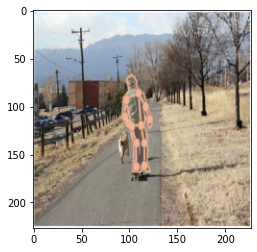

In [6]:
plt.imshow(img)

In [7]:
img.shape

(227, 227, 3)

In [8]:
p = np.array([
  [-0.5, -0.5],
  [0.5, -0.5],
  [-0.5, 0.5],
  [0.5, 0.5]])

v = np.array([
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.4, 0.4]])

p = tf.constant(p.reshape([1, 4, 2]), dtype=tf.float32)
v = tf.constant(v.reshape([1, 4, 2]), dtype=tf.float32)
#t_img = tf.constant(img.reshape(shape), dtype=tf.float32)
img = np.reshape(img, (1, 227, 227, 3))

out_size=(200, 200)

x_s, y_s = tps(p, -v, out_size)

In [13]:
x_s.shape

TensorShape([1, 200, 200])

In [10]:
y_s

<tf.Tensor: id=141, shape=(1, 200, 200), dtype=float32, numpy=
array([[[ 16.724878 ,  16.535795 ,  16.348225 , ...,   3.651774 ,
           3.46421  ,   3.2751262],
        [ 17.540813 ,  17.350542 ,  17.161793 , ...,   4.4462385,
           4.257494 ,   4.0672183],
        [ 18.358273 ,  18.166817 ,  17.976873 , ...,   5.2392006,
           5.049258 ,   4.8578024],
        ...,
        [201.64175  , 201.43118  , 201.2191   , ..., 135.56482  ,
         135.35275  , 135.1422   ],
        [202.4592   , 202.24745  , 202.03418  , ..., 136.35777  ,
         136.1445   , 135.93277  ],
        [203.27512  , 203.0622   , 202.84776  , ..., 137.15224  ,
         136.93779  , 136.72488  ]]], dtype=float32)>

In [ ]:
x_s_flat = x_s_flat*200/2

In [ ]:
y_s_flat = y_s_flat*200/2

In [ ]:
x_s_flat.shape

In [ ]:
x_s_flat[0,:5,:5]

In [ ]:
img.shape

In [14]:
t_img = cv2.remap(img[0], x_s[0].numpy(), y_s[0].numpy(), cv2.INTER_CUBIC)

In [15]:
t_img.shape

(200, 200, 3)

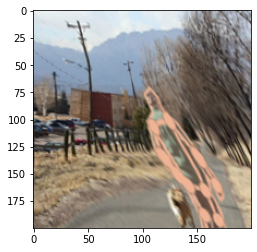

In [16]:
plt.imshow(t_img)

In [ ]:
t_img.shape

In [ ]:
t_img[0].numpy().min()